Code

In [1]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

plt.style.use('ggplot')

In [30]:
data = pd.read_csv('sh_data.csv')
data.head(5)

,Unnamed: 0,Text,Language
0,1269,ನಾನು ಹೋಗಬೇಕಾಗಿದೆ.,Kannada
1,1953,"4, 5. అభిషిక్త క్రైస్తవులు 1919 మొదలుకొని ఏ పన...",Telugu
2,1138,ಆದ್ದರಿಂದ ನೀವು ಯಾರನ್ನಾದರೂ ಭೇಟಿಯಾಗುತ್ತೀರಿ ಮತ್ತು ...,Kannada
3,989,மக்களுக்கு நன்றி.,Tamil
4,1085,ಕೆಲವು ಸಾಮಾನ್ಯ ತಪ್ಪು ಮಾಡುವ ಬಗ್ಗೆ ಮಾತನಾಡಲು ಕೆಲವೊ...,Kannada


In [31]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [32]:
data["Language"].value_counts()

Telugu       600
Malayalam    594
Tamil        469
Kannada      369
Name: Language, dtype: int64

In [33]:
X = data['Text']
X.sample(5)

1034    വളരെ അങ്ങനെ സ്മാർട്ട് വാക്ക് നമ്പർ നാല് ഒന്നുമ...
812     நீங்கள் இந்த வீடியோவைப் பார்க்கும்போது எந்த நா...
1873    మోదీ నాయకత్వంలో ఈ భేటీ సాగేందుకు శ్రీలంక అధ్యక...
1534    అహ్మదాబాద్: గుజరాత్ లో విచిత్రమైన సంఘటన జరిగింది.
80      మెల్లగా మొదలుపెట్టి, క్రమంగా స్థాయిని పెంచుకుం...
Name: Text, dtype: object

In [34]:
Y = data['Language']
Y.sample(5)

1687        Tamil
1113        Tamil
1898       Telugu
779        Telugu
76      Malayalam
Name: Language, dtype: object

In [36]:
data['Language']

0         Kannada
1          Telugu
2         Kannada
3           Tamil
4         Kannada
          ...    
2027        Tamil
2028        Tamil
2029       Telugu
2030    Malayalam
2031    Malayalam
Name: Language, Length: 2032, dtype: object

In [37]:
#from sklearn.preprocessing import LabelEncoder
#import re
le = LabelEncoder()
Y = le.fit_transform(Y)

In [38]:
data_list = []
# iterating through all the text
for text in X:
    
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [39]:
#from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape

(2032, 2735)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 42,test_size=0.30)

In [41]:
models = []
models.append(('Logistic Regression', LogisticRegression()))

models.append(('SVM', SVC(kernel = 'linear')))

models.append(('Multinominal Naive Bayes', MultinomialNB()))

In [42]:
#from sklearn import metrics
results = []
names = []
confusion_matrix_a = []
y_pred_matrix = []
#scoring = 'accuracy'
for name, model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    #classification_r = classification_report(y_test,y_pred)
    cm = confusion_matrix(y_test,np.rint(y_pred)) #confusion_matrix
    print("Accuracy of ",name," is : ",accuracy)
    results.append(accuracy)
    names.append(name)
    confusion_matrix_a.append(cm)
    y_pred_matrix.append(y_pred)
    

Accuracy of  Logistic Regression  is :  0.9311475409836065
Accuracy of  SVM  is :  0.9262295081967213
Accuracy of  Multinominal Naive Bayes  is :  0.9688524590163935


<Figure size 432x288 with 0 Axes>

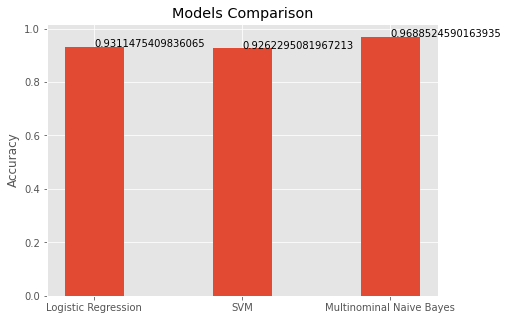

In [81]:
fig = plt.figure()
fig = plt.figure(figsize = (7, 5))
plt.bar(names,results,width=0.4)
plt.text(0,results[0],results[0])
plt.text(1,results[1],results[1])
plt.text(2,results[2],results[2])
plt.title('Models Comparison')
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#plt.figure()
'''
i = 0
for c in confusion_matrix:
  plt.title(names[i])
  sns.heatmap(c, annot=True)
  plt.show()
  i+=1
'''

In [57]:
language_variables = ['Kan','Mal','Tel','Tam']

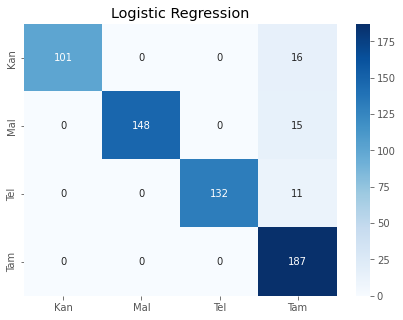

In [58]:
#LR
plt.figure(figsize = (7,5))
sns.heatmap(confusion_matrix_a[0],annot = True,fmt='d', cmap='Blues',xticklabels=language_variables, yticklabels = language_variables)
#sns.set(xlabel='X-Axis', ylabel='Y-Axis')
plt.title(names[0])
plt.show()


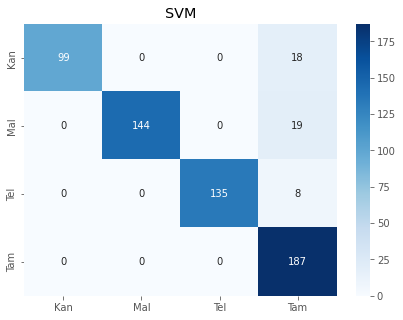

In [59]:
#SVM
plt.figure(figsize = (7,5))
sns.heatmap(confusion_matrix_a[1],annot = True,fmt='d', cmap='Blues',xticklabels=language_variables, yticklabels = language_variables)
plt.title(names[1])
plt.show()

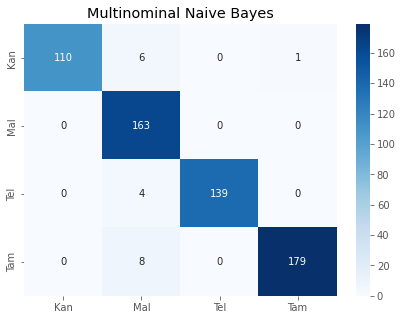

In [60]:
#MNB
plt.figure(figsize = (7,5))
sns.heatmap(confusion_matrix_a[2],annot = True,fmt='d', cmap='Blues',xticklabels=language_variables, yticklabels = language_variables)
plt.title(names[2])
plt.show()

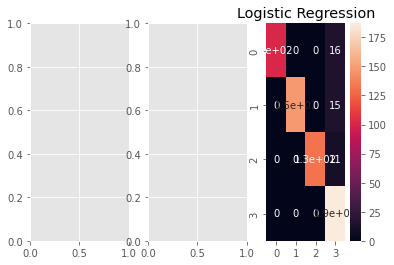

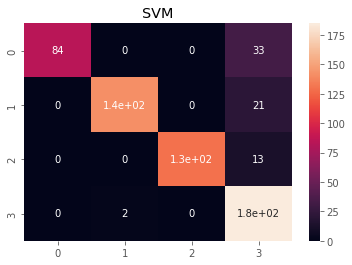

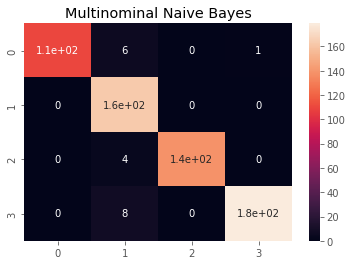

In [ ]:
'''
fig, (m1,m2,m3) = plt.subplots(1,3)
i = 0
for c in confusion_matrix:
  plt.title(names[i])
  sns.heatmap(c, annot=True)
  plt.show()
  i+=1
'''  

In [ ]:
#target_variables = ['LR','SVM','MNB']

In [53]:
#Logistic regression performance metrics:
LR_Cr = classification_report(y_pred_matrix[0],y_pred,target_names = language_variables)
print(LR_Cr)

#y_pred_matrix

              precision    recall  f1-score   support

         Kan       0.92      1.00      0.96       101
         Mal       0.82      1.00      0.90       148
         Tel       0.95      1.00      0.97       132
         Tam       1.00      0.79      0.88       229

    accuracy                           0.92       610
   macro avg       0.92      0.95      0.93       610
weighted avg       0.93      0.92      0.92       610



In [55]:
#SVM
SVM_Cr = classification_report(y_pred_matrix[1],y_pred,target_names = language_variables)
print(SVM_Cr)

              precision    recall  f1-score   support

         Kan       0.90      1.00      0.95        99
         Mal       0.80      1.00      0.89       144
         Tel       0.97      1.00      0.99       135
         Tam       1.00      0.78      0.87       232

    accuracy                           0.91       610
   macro avg       0.92      0.94      0.92       610
weighted avg       0.93      0.91      0.91       610



In [56]:
#MNB
MNB_Cr = classification_report(y_pred_matrix[2],y_pred,target_names = language_variables)
print(MNB_Cr)

              precision    recall  f1-score   support

         Kan       1.00      1.00      1.00       110
         Mal       1.00      1.00      1.00       181
         Tel       1.00      1.00      1.00       139
         Tam       1.00      1.00      1.00       180

    accuracy                           1.00       610
   macro avg       1.00      1.00      1.00       610
weighted avg       1.00      1.00      1.00       610



In [ ]:
#Linear Regression - LR
#Support Vector Machine - SVM
#Multinomial Naive Bayes - MNB
LR = models[0][1]
SVM = models[1][1]
MNB = models[2][1]


In [ ]:
def prediction(text,m):
  x = cv.transform([text]).toarray()
  l = m.predict(x)
  l = le.inverse_transform(l)
  print("The language is ",l)

In [ ]:
prediction("సమానులును నగుదురు. వారు వివేచన-అంతఃకరణ",LR)  #tel

The language is  ['Telugu']


In [ ]:
prediction("உங்களை சந்தித்ததில் மகிழ்ச்ச",SVM)  #tam

The language is  ['Tamil']


In [ ]:
prediction("ഇന്ന് നിങ്ങൾക്കെങ്ങനെയുണ്ട്",MNB)  #mal

The language is  ['Malayalam']


In [ ]:
prediction("ನನ್ನ ಹೆಸರು ಪ್ರಣವ್",MNB)  #Kan

The language is  ['Kannada']
